# Revisando - Regressão Linear

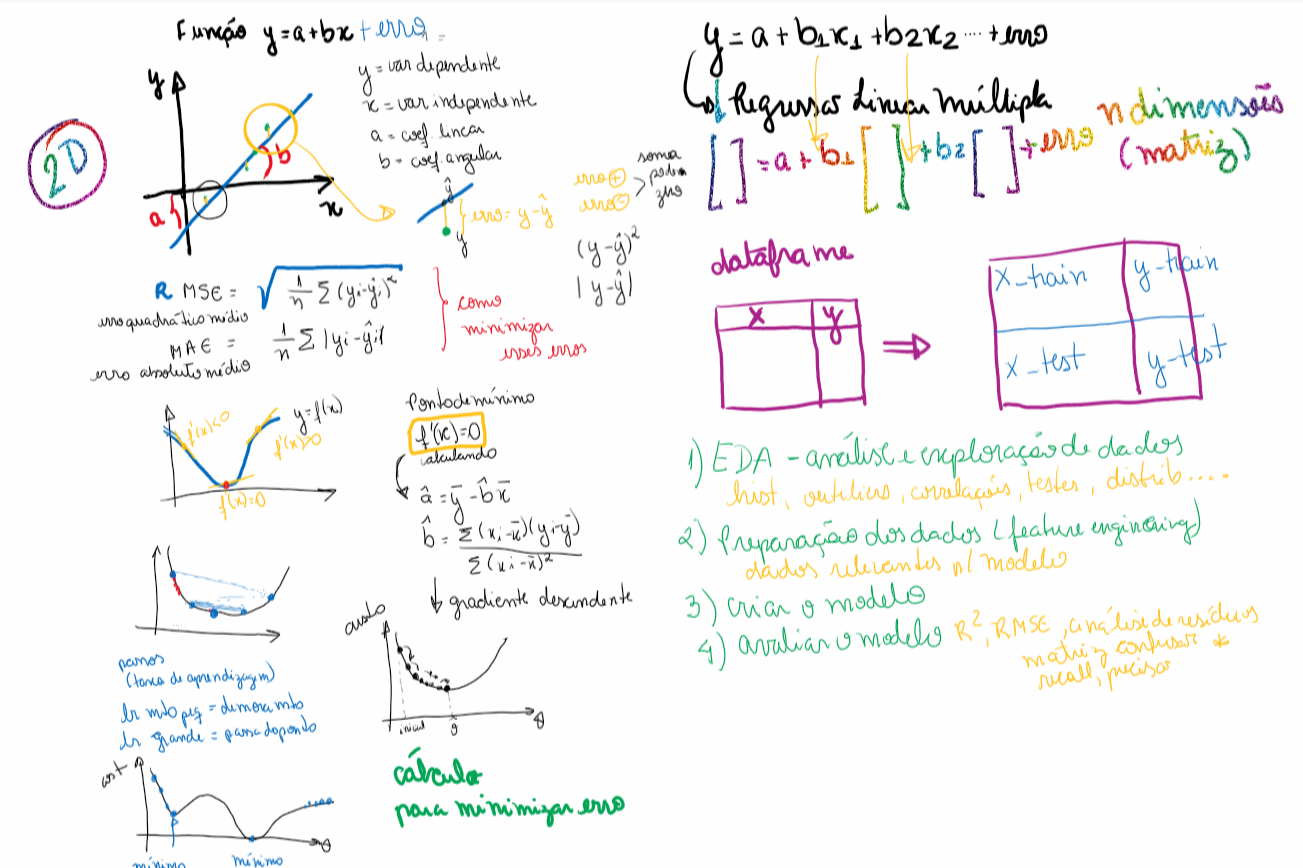

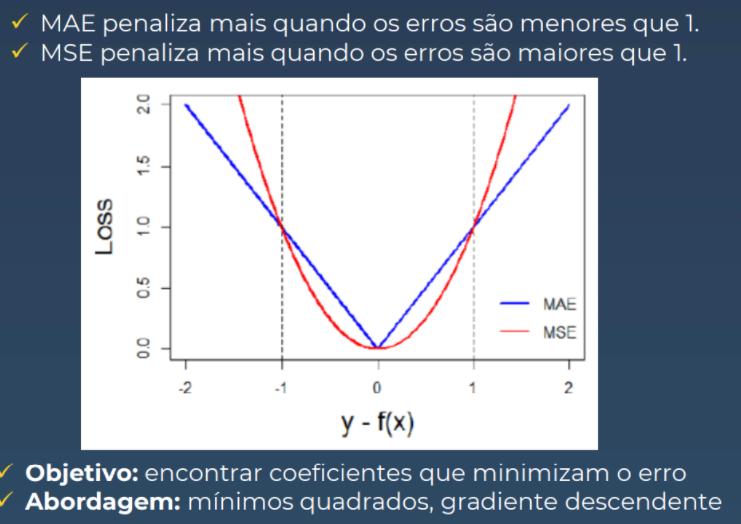

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Regressão Linear Múltipla

**Exemplo**

Calcular o peso em função da altura e do sexo

In [7]:
df_hw = pd.read_csv('https://raw.githubusercontent.com/renatapink/DSdegree/master/Modulo4/Aula11/weight-height.csv')
df_hw.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


**Análise e Exploração dos dados**

In [8]:
# para facilitar, vou converter as unidades
df_hw['altura'] = df_hw['Height'] * 2.54 # pol => cm
df_hw['peso'] = df_hw['Weight'] * 0.453592 # libras => kg

df_hw = df_hw.drop(['Weight','Height'], axis = 1)

Regressão linear simples: Calcular o peso a partir da altura  
Regressão linear múltipla: Calcular o peso a partir de 2 ou mais variáveis

<AxesSubplot:xlabel='altura', ylabel='peso'>

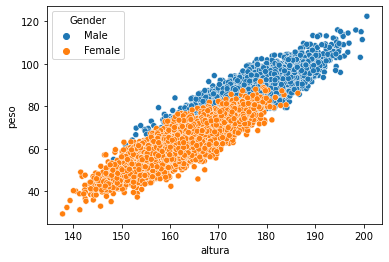

In [11]:
# o quanto cada variável afeta o peso

sns.scatterplot(data=df_hw, x='altura', y='peso', hue='Gender')

**Feature engineering**

In [14]:
# o Gender --> variável qualitativa nominal

df_hw_dummies = pd.get_dummies(df_hw, prefix_sep='_', columns=['Gender'])
df_hw_dummies

,altura,peso,Gender_Female,Gender_Male
0,187.571423,109.720985,0,1
1,174.706036,73.622732,0,1
2,188.239668,96.497550,0,1
3,182.196685,99.809504,0,1
4,177.499761,93.598619,0,1
...,...,...,...,...
9995,168.078536,62.041159,1,0
9996,170.350573,77.504315,1,0
9997,162.224700,58.275377,1,0
9998,175.346978,74.322166,1,0


In [15]:
df_hw_dummies.corr()

,altura,peso,Gender_Female,Gender_Male
altura,1.000000,0.924756,-0.691072,0.691072
peso,0.924756,1.000000,-0.796723,0.796723
Gender_Female,-0.691072,-0.796723,1.000000,-1.000000
Gender_Male,0.691072,0.796723,-1.000000,1.000000


Na preparação dos dados junto com a exploração, são considerados vários fatores:

- escala (normalização/padronização, etc)
- teste de resíduos
- teste de correlação
- transformações de categorias para números (one hot encoding, label, etc)
- várias técnicas de análise dos dados

Para esse exemplo, vamos usar apenas o básico

**Criação do modelo**

- Separação em treino e teste

Uma tecninca para impedir o overfit é separar o conjunto em dois grupos um para treino e outro para teste, assim o algoritmo aprende apenas olhando um conjuto e testa sua equação em outros. Testando em dados que o algoritmo nunca conheceu permite uma verificação mais precisa de sua equação.

Para isto vamos utilizar a função train_test_split do sklearn, que, dado um conjunto x e y, ela retorna quarto grupos de valores. Por padrão ela separa 25% dos dados para treino e 75% para teste.

Com isto conseguimos calcular um valor de erro mais correto.

In [20]:
X = df_hw_dummies[['altura', 'Gender_Female', 'Gender_Male']]
y = df_hw_dummies['peso'] # quem eu quero determinar, var dependente _> target

In [21]:
X

,altura,Gender_Female,Gender_Male
0,187.571423,0,1
1,174.706036,0,1
2,188.239668,0,1
3,182.196685,0,1
4,177.499761,0,1
...,...,...,...
9995,168.078536,1,0
9996,170.350573,1,0
9997,162.224700,1,0
9998,175.346978,1,0


In [22]:
y

0       109.720985
1        73.622732
2        96.497550
3        99.809504
4        93.598619
           ...    
9995     62.041159
9996     77.504315
9997     58.275377
9998     74.322166
9999     51.550324
Name: peso, Length: 10000, dtype: float64

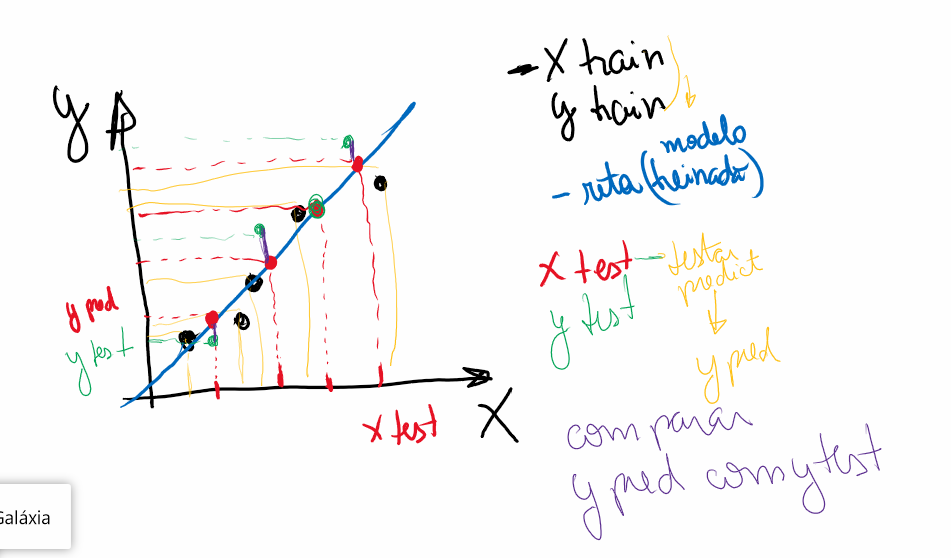

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

In [27]:
X_train.shape,  X_test.shape, y_train.shape, y_test.shape

((7500, 3), (2500, 3), (7500,), (2500,))

In [28]:
# Contrução do modelo
from sklearn.linear_model import LinearRegression

# criando o objeto de regressão
model = LinearRegression() # model = lr = modelo = modelo_regressao

# Treinando a regressão
model.fit(X_train, y_train) # EQUAÇÃO DA RETA COM COEFICIENTES

LinearRegression()

In [29]:
# Testar o modelo treinado

y_pred = model.predict(X_test) # predizer o y ----> SÓ VOU USAR O X PARA DEPOIS COMPARAR O Y

In [30]:
# com o modelo de regressão linear: coeficientes angulares e intercept (coef linear)

model.coef_ # coeficientes de altura,  gender_female, gender_male

array([ 1.06647815, -4.39293624,  4.39293624])

In [31]:
model.intercept_

-106.56926523585753

Isso quer dizer que 

$$\text{peso} = 1.07\cdot\text{altura}-4.39\cdot\text{Gender_Female} + 4.39\cdot\text{Gender_Male} - 106.41 + \text{erro}.$$

(equação da reta para a regressão linear do nosso problema)

In [36]:
df_hw_dummies.head(1)

,altura,peso,Gender_Female,Gender_Male
0,187.571423,109.720985,0,1


In [39]:
model.coef_[0]* 187.571423 + model.coef_[1]* 0 + model.coef_[2]* 1 + model.intercept_ # y_pred e y = 110

97.86449462455525

In [40]:
df_test = pd.concat([X_test, y_test, pd.Series(y_pred, name='peso_predict', index=y_test.index)], axis=1)
df_test

,altura,Gender_Female,Gender_Male,peso,peso_predict
6252,174.465570,1,0,78.523948,75.101516
4684,174.826508,0,1,88.523941,84.272321
1731,168.651246,0,1,77.209274,77.686539
4742,182.700524,0,1,97.544805,92.669787
4521,170.288974,0,1,82.880989,79.433140
...,...,...,...,...,...
4862,179.158055,0,1,92.425399,88.891821
7025,167.317690,1,0,70.722043,67.478459
7647,154.043349,1,0,56.183007,53.321663
7161,170.490952,1,0,74.990052,70.862673


In [41]:
df_test['erro'] = y_pred - y_test #erro ou resíduo
df_test

,altura,Gender_Female,Gender_Male,peso,peso_predict,erro
6252,174.465570,1,0,78.523948,75.101516,-3.422432
4684,174.826508,0,1,88.523941,84.272321,-4.251620
1731,168.651246,0,1,77.209274,77.686539,0.477265
4742,182.700524,0,1,97.544805,92.669787,-4.875018
4521,170.288974,0,1,82.880989,79.433140,-3.447849
...,...,...,...,...,...,...
4862,179.158055,0,1,92.425399,88.891821,-3.533578
7025,167.317690,1,0,70.722043,67.478459,-3.243585
7647,154.043349,1,0,56.183007,53.321663,-2.861344
7161,170.490952,1,0,74.990052,70.862673,-4.127379


**Avaliação do Modelo**

In [42]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.9026809109766419

O modelo possui 90% de eficiência

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)/y_test.mean()
mse = np.sqrt(mean_squared_error(y_test, y_pred)/y_test.mean()**2)

In [44]:
mae

0.04932403996648778

In [45]:
mse

0.06227576518873487

Assim, penalizando os casos mais errados, nossa predição se desviou apenas 6% da média.

**Resíduos - erros**

1. Não devem ser correlacionados

2. Ter média zero

3. Distribuição normal dos resíduos

In [46]:
# verificação

erro = y_pred - y_test
erro.name = 'Residuals'

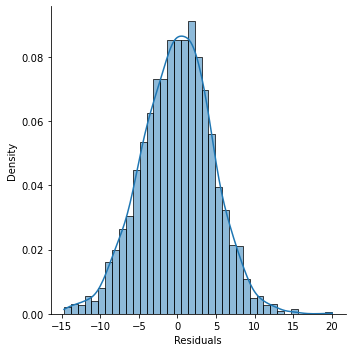

In [47]:
# distribuição normal
sns.displot(erro, kind='hist', stat='density', kde=True)

((array([-3.45297476, -3.20602916, -3.06928934, ...,  3.06928934,
          3.20602916,  3.45297476]),
  array([-14.68147289, -14.46051266, -14.22612543, ...,  14.81179968,
          15.19623616,  20.02090197])),
 (4.579053575926115, -0.06902849152523985, 0.9990846371295395))

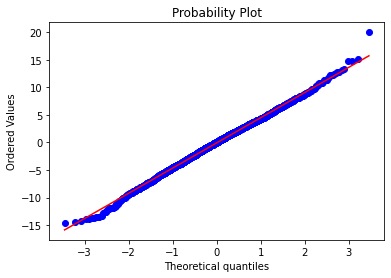

In [48]:
from scipy.stats import probplot

probplot(erro, plot=plt)

In [49]:
# ter média próximo de zero

erro.mean()

-0.06902849152523949

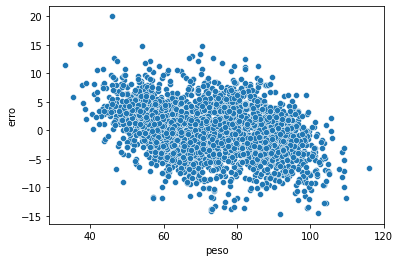

In [51]:
# não pode ter correlação
a = sns.scatterplot(x='peso', y='erro', data=df_test)
a.axhline(xmin=75, xmax=260, color='red')

In [52]:
from statsmodels.regression.linear_model import OLS

model1 = OLS(y_train, X_train)
results = model1.fit()
#print(results.summary())
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   peso   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                 3.480e+04
Date:                Mon, 08 Nov 2021   Prob (F-statistic):               0.00
Time:                        21:52:03   Log-Likelihood:                -21972.
No. Observations:                7500   AIC:                         4.395e+04
Df Residuals:                    7497   BIC:                         4.397e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
altura            1.0665      0.007    144.679      0.000       1.052       1.081
Gender_Female  -110.9622      1.195    -92.823      0.000    -113.306    -108.619
Gender_Male    -102.1763      1.294    -78.957      0.000    -104.713     -99.640
==============================================================================
Omnibus:                        1.313   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.519   Jarque-Bera (JB):                1.322
Skew:                          -0.008   Prob(JB):                        0.516
Kurtosis:                       2.937   Cond. No.                     5.68e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Observação**
Na lista de exercícios, pode usar a função abaixo



In [53]:
# Cria uma função onde retorna todas as principais métricas para Regressão Linear
def linear_regression_metrics(x, y, b):
    # Definindo o tamanho de n
    n = len(y)

    # Inicializando RSE, MSE e MAE
    RMSE = 0
    MSE = 0
    MAE = 0
    R2_num = 0
    R2_den = 0
    y_mean = np.mean(y)
    # Iterando para todos os valores de y
    for i in range(0, n):
        y_pred = b[0] + x[i]*b[1]
        diff_y = y[i] - y_pred
        RMSE = RMSE + diff_y**2
        MSE = MSE + diff_y**2
        MAE = MAE + np.abs(diff_y)
        R2_num = R2_num + diff_y**2
        R2_den = R2_den + (y[i] - y_mean)**2
    RMSE = (RMSE/(n))**(0.5)
    MSE = MSE/n
    MAE = MAE/n
    R2 = 1 - R2_num/R2_den
    return RMSE, MSE, MAE, R2

In [ ]:
RMSE, MSE, MAE, R2 = linear_regression_metrics(x, y, b)
print('Métricas: ')
print('RMSE: ', np.round(RMSE, 3))
print('MSE: ', np.round(MSE, 3))
print('MAE: ', np.round(MAE, 3))
print('R2:  ', np.round(R2, 3))

#  Regressão Linear Múltipla

Na regressão linear múltipla, temos o modelo como: $Y = \beta_0 + \beta_1 X_1  + \beta_2 X_2 + ... + \beta_n X_n$

#### Exemplo 2

Para o exemplo de Regressão Linear Múltipla, iremos utilizar o dataset *Car_Prices.csv*, onde o objetivo é estimar o preço dos carros a partir de suas características.


Problem Description
A Chinese automobile company Teclov_chinese aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. Essentially, the company wants to know:

• Which variables are significant in predicting the price of a car

• How well those variables describe the price of a car Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.

In [59]:
cars = pd.read_csv('https://raw.githubusercontent.com/renatapink/DSdegree/master/Modulo4/Datasets/CarPrice_Assignment.csv')

- EDA

- Preparação dos dados

- Criação do modelo

- Avaliar modelo

Dica de ouro: https://www.kaggle.com/dronax/car-prices-dataset/notebook

In [ ]:
!pip install scipy